In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak

In [5]:
df = pd.read_csv(r"ISIC_2019_Training_data_model2.csv")

In [6]:
df.drop_duplicates()
df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df[['MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK']].value_counts()

MEL  NV   BCC  AK   BKL  DF   VASC  SCC  UNK
0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    12875
1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0     4522
0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0     3323
          0.0  0.0  1.0  0.0  0.0   0.0  0.0     2624
               1.0  0.0  0.0  0.0   0.0  0.0      867
               0.0  0.0  0.0  0.0   1.0  0.0      628
                              1.0   0.0  0.0      253
                         1.0  0.0   0.0  0.0      239
dtype: int64

In [8]:
df['POSITIVE']=df['MEL']+df['BCC']+df['AK']+df['DF']+df['VASC']+df['SCC']+df['UNK']
df['NEGATIVE']=df['NV']+df['BKL']
df['LABEL']=df['POSITIVE']

In [9]:
df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df['LABEL'].value_counts()

0.0    15499
1.0     9832
Name: LABEL, dtype: int64

# BALANCING

In [11]:
from sklearn.utils import resample

df_0 = df[df['LABEL'] == 0]
df_1 = df[df['LABEL'] == 1]

df_0_balanced = df_0.sample(9832) 



#Combined back to a single dataframe
df_balanced = pd.concat([df_0_balanced, df_1])

In [12]:
df_balanced['LABEL'].value_counts()

0.0    9832
1.0    9832
Name: LABEL, dtype: int64

In [13]:
df_balanced

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL
23252,ISIC_0069937,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9657,ISIC_0031060,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16112,ISIC_0058624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9021,ISIC_0030424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13203,ISIC_0053915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,ISIC_0073238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25322,ISIC_0073241,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25325,ISIC_0073246,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
df_balanced=df_balanced.sample(frac=1)
df_balanced=df_balanced.reset_index(drop=True)
df_balanced

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL
0,ISIC_0031651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,ISIC_0028102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ISIC_0067274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,ISIC_0025044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ISIC_0032556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,ISIC_0027882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19660,ISIC_0063669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
19661,ISIC_0072101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19662,ISIC_0071295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
df_balanced['folder']="ISIC_2019_Training_Input/"
df_balanced['path']=(df_balanced['folder']+df_balanced['image'])+".jpg"
df_balanced['path']

0        ISIC_2019_Training_Input/ISIC_0031651.jpg
1        ISIC_2019_Training_Input/ISIC_0028102.jpg
2        ISIC_2019_Training_Input/ISIC_0067274.jpg
3        ISIC_2019_Training_Input/ISIC_0025044.jpg
4        ISIC_2019_Training_Input/ISIC_0032556.jpg
                           ...                    
19659    ISIC_2019_Training_Input/ISIC_0027882.jpg
19660    ISIC_2019_Training_Input/ISIC_0063669.jpg
19661    ISIC_2019_Training_Input/ISIC_0072101.jpg
19662    ISIC_2019_Training_Input/ISIC_0071295.jpg
19663    ISIC_2019_Training_Input/ISIC_0030730.jpg
Name: path, Length: 19664, dtype: object

In [214]:
df_balanced['JPG'] = df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))
df_balanced

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL,folder,path,JPG
0,ISIC_0031651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0031651.jpg,"[[[206, 169, 173], [206, 167, 168], [209, 169,..."
1,ISIC_0028102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0028102.jpg,"[[[196, 104, 100], [197, 104, 98], [198, 101, ..."
2,ISIC_0067274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0067274.jpg,"[[[2, 2, 2], [2, 2, 2], [3, 3, 3], [3, 3, 3], ..."
3,ISIC_0025044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0025044.jpg,"[[[222, 149, 150], [223, 151, 156], [226, 155,..."
4,ISIC_0032556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0032556.jpg,"[[[172, 152, 173], [173, 147, 169], [172, 146,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,ISIC_0027882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0027882.jpg,"[[[237, 149, 165], [236, 149, 163], [238, 152,..."
19660,ISIC_0063669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0063669.jpg,"[[[186, 150, 108], [196, 168, 133], [202, 179,..."
19661,ISIC_0072101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0072101.jpg,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
19662,ISIC_0071295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0071295.jpg,"[[[44, 44, 38], [53, 54, 47], [63, 61, 55], [7..."


In [248]:
df_balanced.head(-10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL,folder,path,JPG
0,ISIC_0031651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0031651.jpg,"[[[206, 169, 173], [206, 167, 168], [209, 169,..."
1,ISIC_0028102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0028102.jpg,"[[[196, 104, 100], [197, 104, 98], [198, 101, ..."
2,ISIC_0067274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0067274.jpg,"[[[2, 2, 2], [2, 2, 2], [3, 3, 3], [3, 3, 3], ..."
3,ISIC_0025044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0025044.jpg,"[[[222, 149, 150], [223, 151, 156], [226, 155,..."
4,ISIC_0032556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0032556.jpg,"[[[172, 152, 173], [173, 147, 169], [172, 146,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19649,ISIC_0026840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0026840.jpg,"[[[200, 110, 122], [202, 113, 126], [202, 113,..."
19650,ISIC_0066423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0066423.jpg,"[[[142, 139, 146], [159, 156, 160], [174, 172,..."
19651,ISIC_0065308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0065308.jpg,"[[[110, 85, 91], [121, 97, 104], [128, 105, 11..."
19652,ISIC_0034072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0034072.jpg,"[[[158, 140, 153], [161, 144, 158], [163, 147,..."


In [215]:
X = np.asarray(df_balanced['JPG'].tolist())
X = X/255  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=df_balanced['LABEL']  #Assign label values to Y
#Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [216]:
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
history = clf.fit(x_train, y_train)

Trial 1 Complete [00h 05m 59s]
val_loss: 0.5191744565963745

Best val_loss So Far: 0.5191744565963745
Total elapsed time: 00h 05m 59s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/3
461/461 [==============================] - 35s 72ms/step - loss: 0.5632 - accuracy: 0.7038
Epoch 2/3
461/461 [==============================] - 28s 60ms/step - loss: 0.4949 - accuracy: 0.7558
Epoch 3/3
461/461 [==============================] - 27s 58ms/step - loss: 0.4332 - accuracy: 0.7950


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [217]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 64, 3)        0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 64, 64, 3)        7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0     

In [218]:
print(clf.evaluate(x_test, y_test))

154/154 [==============================] - 4s 23ms/step - loss: 0.5318 - accuracy: 0.7321
[0.5317752957344055, 0.7320992350578308]


In [227]:
y=df_balanced

x=y['JPG'].sample(1)
image  = np.asarray(x.tolist())

predicted_y = clf.predict(image)

print('Actual type:',y['LABEL'].iloc[x.index[0]])
print('Predicted type:')
#print(x1)
#print(round(x1.max()))
classes = np.argmax(predicted_y, axis = 1)
if predicted_y == 0:
    print('NO')
if predicted_y == 1:
    print('YES')
# print(predicted_y)

1/1 [==============================] - 0s 6ms/step
Actual type: 1.0
Predicted type:
NO


In [220]:
Y = Y.astype(int)

In [228]:
y_train.value_counts()

1.0    7382
0.0    7366
Name: LABEL, dtype: int64

In [229]:
y_pred = model.predict(x_test)
y_pred_binary = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test)

154/154 [==============================] - 3s 17ms/step


In [175]:
y_pred

array([[0.61315405],
       [0.02696967],
       [0.40313148],
       ...,
       [0.68176097],
       [0.00988929],
       [0.78641075]], dtype=float32)

In [230]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print(y_pred)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [161]:
y_pred_binary = np.argmax(y_pred, axis = 1, keepdims=True)

In [162]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [171]:
result = np.argmax(y_pred)
value = y_pred[result]

In [172]:
value

array([1.])

In [173]:
result

0

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [165]:
idx = np.argmax(y_pred, axis=-1)
y_pred = np.zeros( y_pred.shape )
y_pred[ np.arange(y_pred.shape[0]), idx] = 1

In [166]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [167]:
pd.DataFrame(y_pred).value_counts()

1.0    4916
dtype: int64

In [ ]:
y = np.argmax(prob, axis=1)

In [120]:
y_test

19049    1.0
10393    0.0
11675    1.0
8031     0.0
5421     0.0
        ... 
10887    0.0
17166    1.0
3441     1.0
8766     0.0
13485    0.0
Name: LABEL, Length: 4916, dtype: float64

In [121]:
y_true

0

In [98]:
y_true = y_test.to_list()

In [231]:
cm = confusion_matrix(y_pred, y_test)

Text(48.5, 0.5, 'Prediction Cancer Type')

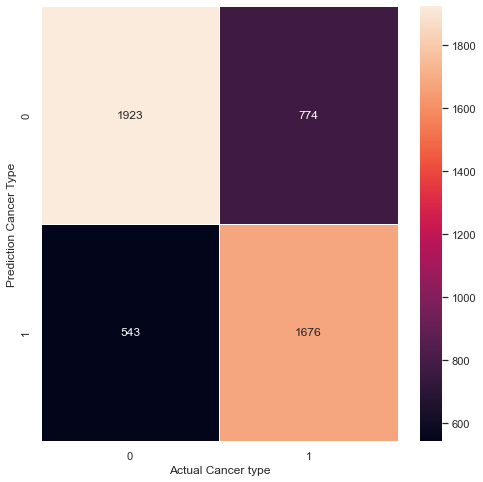

In [232]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True,linewidths=.5, ax=ax,fmt="d")
plt.xlabel("Actual Cancer type")
plt.ylabel("Prediction Cancer Type")

In [233]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

In [234]:
recall

0.6840816326530612

In [235]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy = accuracy_score(y_test, y_pred)

In [240]:
accuracy

0.7320992676973149

In [241]:
df_balanced

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,POSITIVE,NEGATIVE,LABEL,folder,path,JPG
0,ISIC_0031651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0031651.jpg,"[[[206, 169, 173], [206, 167, 168], [209, 169,..."
1,ISIC_0028102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0028102.jpg,"[[[196, 104, 100], [197, 104, 98], [198, 101, ..."
2,ISIC_0067274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0067274.jpg,"[[[2, 2, 2], [2, 2, 2], [3, 3, 3], [3, 3, 3], ..."
3,ISIC_0025044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0025044.jpg,"[[[222, 149, 150], [223, 151, 156], [226, 155,..."
4,ISIC_0032556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0032556.jpg,"[[[172, 152, 173], [173, 147, 169], [172, 146,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,ISIC_0027882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0027882.jpg,"[[[237, 149, 165], [236, 149, 163], [238, 152,..."
19660,ISIC_0063669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0063669.jpg,"[[[186, 150, 108], [196, 168, 133], [202, 179,..."
19661,ISIC_0072101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0072101.jpg,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
19662,ISIC_0071295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,ISIC_2019_Training_Input/,ISIC_2019_Training_Input/ISIC_0071295.jpg,"[[[44, 44, 38], [53, 54, 47], [63, 61, 55], [7..."


In [247]:
y=df_balanced

x=y['JPG'].sample(1)
image  = np.asarray(x.tolist())

predicted_y = clf.predict(image)

print('Actual type:',y['LABEL'].iloc[x.index[0]])
print('Predicted type:')
#print(x1)
#print(round(x1.max()))
classes = np.argmax(predicted_y, axis = 1)
if predicted_y == 0:
    print('NO')
if predicted_y == 1:
    print('YES')

1/1 [==============================] - 0s 6ms/step
Actual type: 1.0
Predicted type:
NO
